The   problem   description   is   available   at    https://www.kaggle.com/c/DontGetKicked

We   expect   solutions   in   the   form   of   a   short   report   +   working   code.      Ideally,   you   should   be   able   to explore   the   data   a   bit,   apply   a   basic   model,   figure   out   what   types   of   things   you   could   do   to improve   model   performance   given   more   time.      Be   specific   about   the   evaluation   metric   you   use and   what   performance   you   can   get.

- The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.
- All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt 
- The data contains missing values 
- The dependent variable (IsBadBuy) is binary (C2)
- There are 32 Independent variables (C3-C34)
- The data set is split to 60% training and 40% testing.

# Step1, Data exploration
1. check data size, missing value, result balancing
2. box plot to see distribution, understand each feature
3. find correlation between features that have missing values or not, recover value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info() # 72983 *34
# test.info() # 48707 *33

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [4]:
train.groupby(['IsBadBuy']).size()# check data balance

IsBadBuy
0    64007
1     8976
dtype: int64

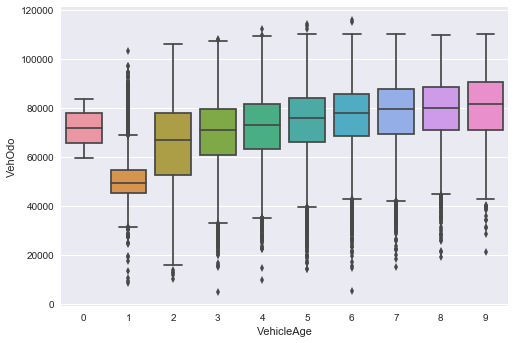

In [5]:
# I am surpised that VehOdo is stable at 7k~8k from 2 to 9 years
sns.boxplot(x='VehicleAge',y='VehOdo', data = train)

In [6]:
# train.head() # check data format

In [7]:
8976/72983

0.12298754504473644

# **Note:** The positive result, IsBadBuy, is only 12.3%. The target feature is highly skewed. Even we blindly predit all outputs are negative, we still get a baseline accuracy of 87.7%.  So f-score should be used as evaluation metric.

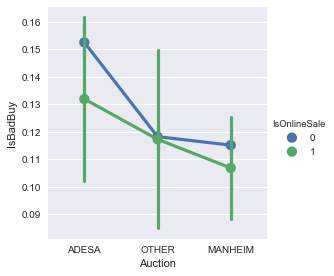

In [8]:
sns.factorplot('Auction','IsBadBuy', data=train,hue = "IsOnlineSale")

In [9]:
#sns.boxplot(y='VehYear',x='IsBadBuy', data = train)

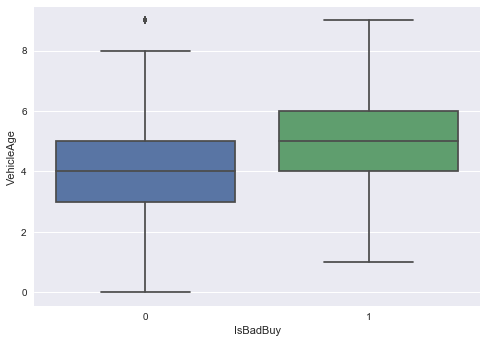

In [10]:
sns.boxplot(y='VehicleAge',x='IsBadBuy', data = train)

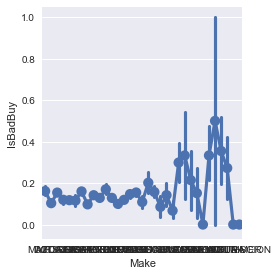

In [11]:
sns.factorplot('Make','IsBadBuy', data=train)

In [12]:
#sns.factorplot('Model','IsBadBuy', data=train) # not significant
#sns.factorplot('Trim','IsBadBuy', data=train)   # depends on car model
#sns.factorplot('Color','IsBadBuy', data=train,size=5, aspect=1)

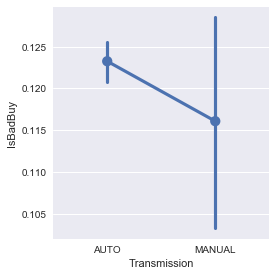

In [13]:
train.loc[train['Transmission']=='Manual','Transmission'] = 'MANUAL'
sns.factorplot('Transmission','IsBadBuy', data=train)  # 12.3%, 11.6%

In [14]:
# train.groupby(['Transmission','IsBadBuy']).size()

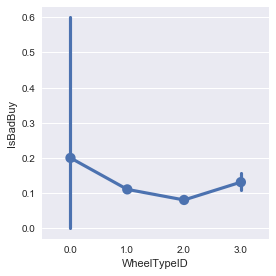

In [15]:
sns.factorplot('WheelTypeID','IsBadBuy', data=train)

In [16]:
train.groupby('WheelTypeID').size().sum()  # 3000 missing data

69814

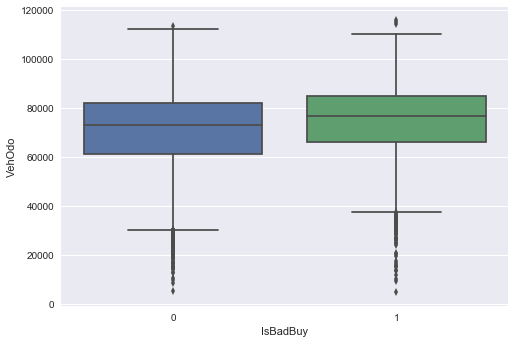

In [17]:
sns.boxplot(y='VehOdo',x='IsBadBuy', data = train)

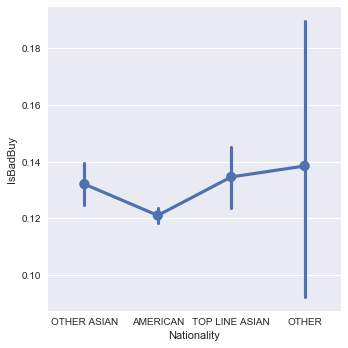

In [18]:
sns.factorplot('Nationality','IsBadBuy', data=train,size=5, aspect=1)

In [19]:
train.groupby(['Nationality','IsBadBuy']).size()

Nationality     IsBadBuy
AMERICAN        0           53641
                1            7387
OTHER           0             168
                1              27
OTHER ASIAN     0            6972
                1            1061
TOP LINE ASIAN  0            3221
                1             501
dtype: int64

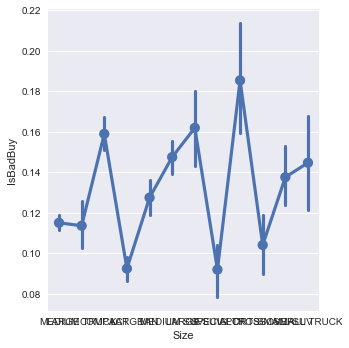

In [20]:
sns.factorplot('Size','IsBadBuy', data=train,size=5, aspect=1)

In [21]:
#train.groupby(['Size','IsBadBuy']).size()

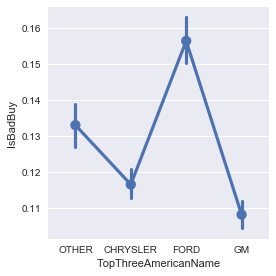

In [22]:
sns.factorplot(x='TopThreeAmericanName',y='IsBadBuy', data=train)

In [23]:
train.groupby(['TopThreeAmericanName','IsBadBuy']).size()

TopThreeAmericanName  IsBadBuy
CHRYSLER              0           20674
                      1            2725
FORD                  0           10389
                      1            1926
GM                    0           22578
                      1            2736
OTHER                 0           10361
                      1            1589
dtype: int64

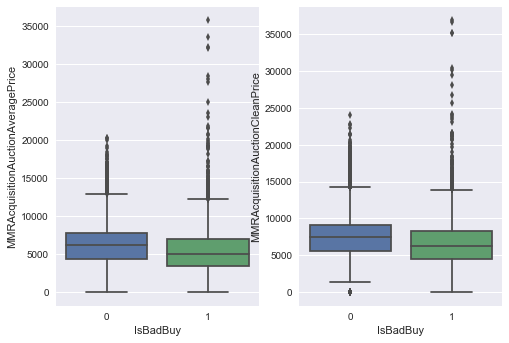

In [24]:
plt.subplot(121)
sns.boxplot(x='IsBadBuy', y = 'MMRAcquisitionAuctionAveragePrice', data=train)
plt.subplot(122)
sns.boxplot(x='IsBadBuy', y = 'MMRAcquisitionAuctionCleanPrice', data = train)

In [25]:
train.groupby('IsBadBuy')[['MMRAcquisitionAuctionAveragePrice','VehBCost','WarrantyCost']].median()

,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
IsBadBuy,,,
0,6240.5,6800.0,1155
1,5005.0,6000.0,1243


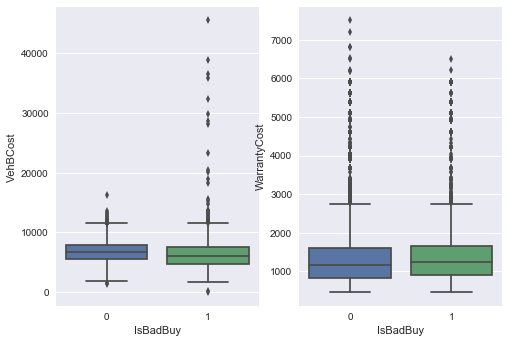

In [26]:
plt.subplot(121)
sns.boxplot(y='VehBCost',x='IsBadBuy', data=train)
plt.subplot(122)
sns.boxplot(y='WarrantyCost',x='IsBadBuy', data=train)

### try diffence of price
no significant difference

In [27]:
train['Auction_C_A'] =train['MMRAcquisitionAuctionCleanPrice']-train['MMRAcquisitionAuctionAveragePrice']
train['Retail_C_A']  =train['MMRAcquisitonRetailCleanPrice'] -train['MMRAcquisitionRetailAveragePrice']
train['profit'] = train['MMRAcquisitionRetailAveragePrice'] -train['MMRAcquisitionAuctionAveragePrice']
train['profit_clean'] = train['MMRAcquisitonRetailCleanPrice'] -train['MMRAcquisitionAuctionCleanPrice']

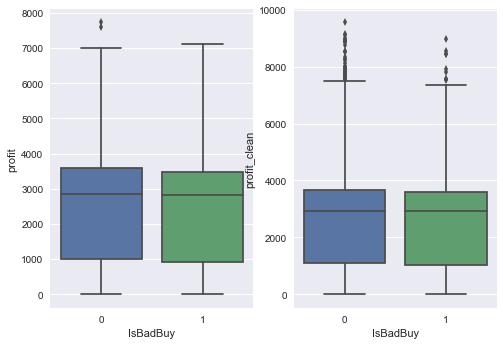

In [28]:
plt.subplot(121)
sns.boxplot(y='profit',x='IsBadBuy', data=train)
plt.subplot(122)
sns.boxplot(y='profit_clean',x='IsBadBuy', data=train)

### analyze numerical data correlation
'MMRAcquisitionAuctionAveragePrice' is shown to highly correlated to'VehBCost'

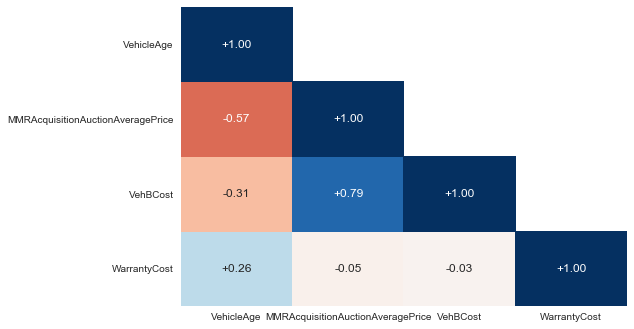

In [29]:
p = train[['VehicleAge','MMRAcquisitionAuctionAveragePrice','VehBCost','WarrantyCost']].copy()

# plot correlation matrix
corr = p.corr()
mask = np.zeros_like(corr)  # create a mask so we only see the correlation values once
mask[np.triu_indices_from(mask, 1)] = True
# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

# step 2. Data preprocessing
1. extract relevant features, fill missing data
2. feature scaling, categorical encoding
3. separate predictor features and target feature

### After exploration, I find some interesting correlation. The overall lemon rate is 12.3%. Among the 33 input features, only 14 may has some correlation:
- Auction: ADESA gives more BadBuy
- VehYear, VehicleAge: both represent the same thing, BadBuy has larger vehicle age
- Make
- Color: **missing 8 data**   
- Transmission: data dominant by automation, **missing 1 data**   
- WheelTypeID: type 3 leads to more BadBuy; **missing 3000 +data**
- VehOdo: BadBuy has larger odometer
- Nationality: data dominate by American (61k),**missing 5 data**    
- Size: **missing 5 data**
- TopThreeAmericanName: **missing 5 data**
- Price: BadBuy has lower price in whatever type, **missing 13 data**
- VehBCost: BadBuy has slightly lower buy cost, not significant
- WarrentyCost: BadBuy has higher WarrentyCost
- IsOnlineSale: online sale has lower badBuy, but offline is dominate. (71k)

### begin to build training data

In [30]:
# reload data, fill na
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
train.loc[train['Transmission']=='Manual','Transmission'] = 'MANUAL'
train.loc[:,"WheelTypeID"].fillna(value=0.0,inplace = True) # key step

In [31]:
# choose different combination of features
#feature_cate = ['Auction','Make','Color','Transmission','Nationality',
#               'Size', 'TopThreeAmericanName','IsOnlineSale']
#feature_cate = ['Auction','Make','Size', 'TopThreeAmericanName']
feature_cate = ['Auction',"WheelTypeID",'TopThreeAmericanName']
feature_num = ['VehicleAge','VehBCost']
feature_label = ['IsBadBuy']

In [32]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn import metrics

In [33]:
data = train[feature_num+feature_cate+feature_label].copy()
data.info()  # 72983 *7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 6 columns):
VehicleAge              72983 non-null int64
VehBCost                72983 non-null float64
Auction                 72983 non-null object
WheelTypeID             72983 non-null float64
TopThreeAmericanName    72978 non-null object
IsBadBuy                72983 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


In [34]:
# drop a few na to avoid processing error
data.dropna(axis= 0, how='any',inplace = True)

In [35]:
#X_scaler = StandardScaler().fit_transform(train_new.values)
scaled_features = {}  # Store scalings in a dictionary to convert back later
for each in feature_num:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [36]:
dummied_features ={}  # store variety for later comparison with test set
for each in feature_cate:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)
    dummied_features[each] = set(dummies.columns)

In [37]:
labels = data[feature_label]
data.drop(labels=feature_cate,axis=1,inplace = True)
data.drop(labels=feature_label,axis=1,inplace = True)

# data mining/machine learning
1. decision tree and feature importance
2. random forest
3. svm

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(
    data, labels, test_size=0.3, random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,fbeta_score

pred=clf.predict(X_test)
print('accuracy:',accuracy_score(y_test, pred))
print('f_0.5:',fbeta_score(y_test, pred, beta=0.5))
print('f_2:',fbeta_score(y_test, pred, beta=2))

accuracy: 0.845345756828
f_0.5: 0.320141709151
f_2: 0.290201300227


In [40]:
def feature_plot(importances, X_train):   
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12) 
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

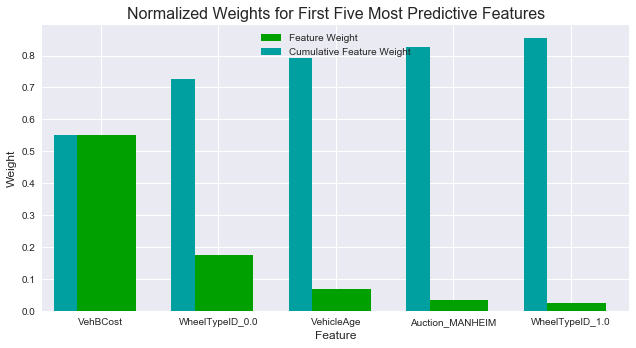

In [41]:
feature_plot(clf.feature_importances_,X_train)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
print('accuracy:',accuracy_score(y_test, pred))
print('f_0.5:',fbeta_score(y_test, pred, beta=0.5))
print('f_2:',fbeta_score(y_test, pred, beta=2))

/Users/yuchaojiang/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


accuracy: 0.854115282726
f_0.5: 0.339728591483
f_2: 0.289358310084


In [43]:
from time import time
from sklearn import svm
t0 = time()
#clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='rbf')

clf.fit(X_train,y_train)

pred=clf.predict(X_test)
print('accuracy:',accuracy_score(y_test, pred))
print('f_0.5:',fbeta_score(y_test, pred, beta=0.5))
print('f_2:',fbeta_score(y_test, pred, beta=2))
print("time cost:", time()-t0)

/Users/yuchaojiang/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.902347675162
f_0.5: 0.550916681793
f_2: 0.269753799662
time cost: 106.73294305801392


In [44]:
# save classifier
from sklearn.externals import joblib
joblib.dump(clf, 'lemon_svm.pkl') 

['lemon_svm.pkl']